# Sunspots Theory

© Dimitrios Theodorakis GNU General Public License v3.0 https://github.com/DimitriosAstro/Astronomy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
%matplotlib inline

### AIM - To visualise and describe the motion of a sunspot

This notebook will look at a theoretical sunspot travelling across the face of the sun and explore why a third degree polyfit is used in ```sunspotsAuto.py``` to test whether we found a good sunspot track.

Sunspots move across the face of the sun parallel to the equator. This means they move in circles (if you look down on the sun from the top or vice versa). A circle can be related to the trig functions sine and cosine:

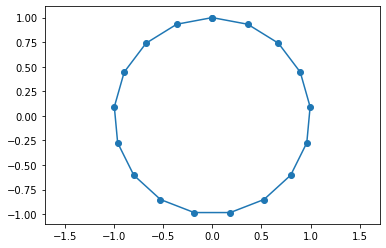

In [2]:
t = np.linspace(0, 2*np.pi, 18)
# make x equal to the cos(t) and y equal to sin(t)
# Your code here:
x = np.cos(t)
y = np.sin(t)

fig = plt.figure(1)
plt.scatter(y, x),plt.axis('equal')
plt.plot(y, x)

We have a circle! This circle is pointy though because we only used 18 points for our plot. This is our top down view of the sun showing a sunspot moving with one full rotation of the sun.

Let's see if we can plot the side view:

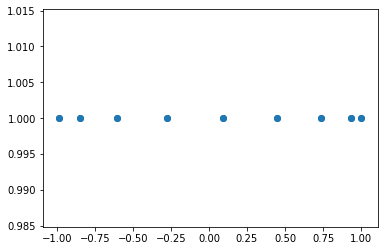

In [3]:
fig = plt.figure(2)
plt.scatter(x, np.ones(len(x)))

Here we see the path of the sunspot that you'd see on Earth as we see the side face of the sun not the top. Notice how towards the sides they points seem to bunch up? The sunspot is still rotating with the sun the same amount but because of our perspective it looks like it hasn't moved much in the x direction.

In ```sunspots.ipynb``` and ```sunspotsAuto.py``` we deal with images where the origin is not the center of the image rather the lower left corner. Let's shift our data to match this:

In [4]:
shiftx = []
# x starts at 1 and goes to -1, shift x to start at 0 and go to 2
# Hint: Use a for loop with an if else statement inside!
# Your code here:
for i in x:
    if i < 0:
        shiftx.append(1+abs(i))
    else:
        shiftx.append(1-abs(i))

shiftx

[0.0,
 0.06752777059564419,
 0.2609910827793409,
 0.5542616442234617,
 0.907731640536698,
 1.2736629900720828,
 1.6026346363792563,
 1.8502171357296142,
 1.982973099683902,
 1.982973099683902,
 1.850217135729614,
 1.6026346363792565,
 1.273662990072083,
 0.9077316405366984,
 0.5542616442234615,
 0.2609910827793408,
 0.06752777059564419,
 0.0]

Now we've made the values positive let's plot them vs time:

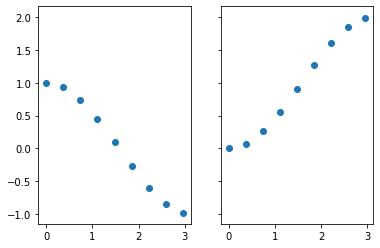

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
half = int(np.floor(len(t)/2))
ax1.scatter(t[:half],x[:half])
ax2.scatter(t[:half],shiftx[:half])

On the left is our before and the right after shifting the x values to be positive and increasing like in our images. Notice that the time was cut in half so we don't see what happens on the side of the sun facing away from us.

This fake sunspot's path looks a bit like an s shape. We can try fitting a curve to it using ```np.polyfit()```:

In [6]:
fit1 = np.polyfit(t[:half],shiftx[:half],1)
fit1

array([ 0.75228571, -0.16773215])

The array gives us the gradient then the intercept of the fit. If we include ```full=True``` it will also give us some info about the goodness of the fit:

In [7]:
np.polyfit(t[:half],shiftx[:half],1,full=True)

(array([ 0.75228571, -0.16773215]),
 array([0.08370929]),
 2,
 array([1.35652794, 0.39978988]),
 1.9984014443252818e-15)

The second array is the residuals from fitting a straight line (hence the 1 in polyfit()). Let's add this fit to our graph:

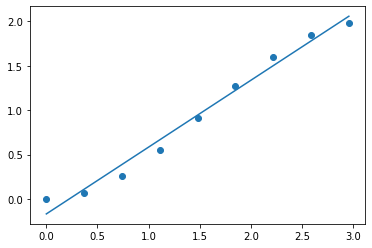

In [8]:
fig = plt.figure(3)
ax = fig.add_subplot()
ax.scatter(t[:half],shiftx[:half])
# the first entry in fit1 is the gradient, the second is the intercept
# calculate shiftxTheory1 = mt + c
# Your code here:
shiftxTheory1 = fit1[0]*t[:half] + fit1[1]

ax.plot(t[:half], shiftxTheory1)

That fit doesn't look great, it turns out a third order fit is best:

Residual = 8.139261679526505e-05


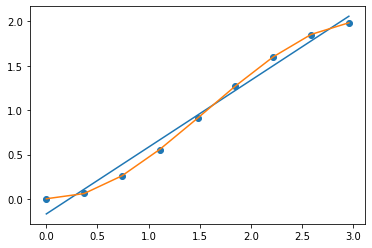

In [9]:
fit3 = np.polyfit(t[:half],shiftx[:half],3,full=True)
print('Residual = '+str(fit3[1][0]))
shiftxTheory3 = fit3[0][0]*t[:half]**3 + fit3[0][1]*t[:half]**2 + fit3[0][2]*t[:half] + fit3[0][3]
ax.plot(t[:half], shiftxTheory3)
fig

A much better fit and smaller residual! In ```sunspotsAuto.py``` I use a third degree polynomial fit to test whether to accept or reject a sunspot track.

The sunspots 's' curve is actually just part of a sin wave and the path of the sunspot as we see it on the surface looks like an object in simple harmonic motion. Viewed top down the sunspot is travelling in uniform circular motion (travelling on a circular path). This leads us to the equation we use in ```sunspots.ipynb``` to calculate the period of rotation:

$$x = Asin(\frac{2\pi}{T}t+\phi)$$

Where we tend to ignore $\phi$ because the gradient of a graph of $arcsin(x/A)$ vs $t$ gives us $2\pi/T$ which we can use to find the time period $T$:

$$T = \frac{2\pi}{m}$$

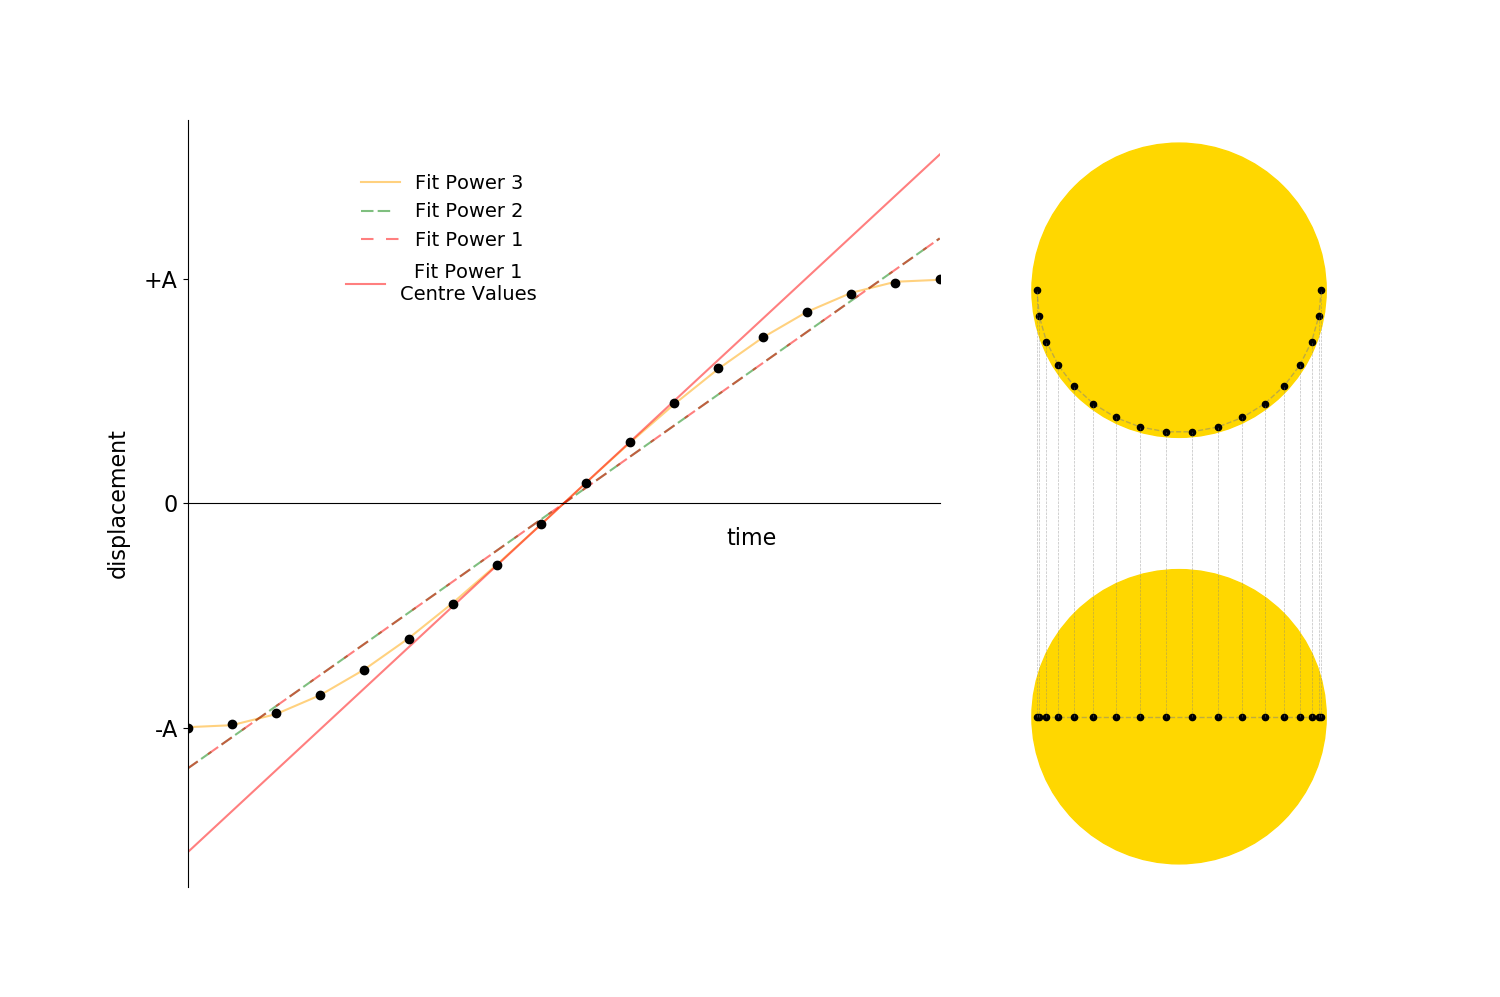

In [10]:
Image('./figures/theorySunspotsPathAll.png')

In this final image you can see the path of a sunspot on the left if we plot displacement on the y axis (displacment from the axis of rotation). This shows that the third order fit is good and a first order fit is only good for the time when the sunspot is near the rotation axis of the sun. 

On the right, at the top is the top-down view of the sun showing the circular motion of the sunspot, and on the bottom is the face of the sun as we see it showing the sunspot in simple harmonic motion.

You can create this diagram yourself using ```theorySunspots.py```.

# Reference

1) scienceinschool - Measuring Solar Rotation - https://www.scienceinschool.org/content/sunspots-rotating-sun